# Automobile MPG Analysis with Linear Regression

Testing the custom gradient descent linear regression implementation on the Auto MPG dataset from the UCI Machine Learning Repository.

**Dataset**: Auto MPG dataset - predicting fuel efficiency (miles per gallon) from vehicle characteristics.

**Model**: Linear regression trained via gradient descent (custom implementation from previous notebook).

## 1. Import Libraries and Load Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configure matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

In [11]:
# Load the Auto MPG dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep='\s+', names=column_names, na_values='?')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 10 rows:")
df.head(10)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\evya1\AppData\Local\Temp\ipykernel_63300\3689906815.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep='\s+', names=column_names, na_values='?')


Dataset shape: (398, 9)

First 10 rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


## 2. Data Exploration and Cleaning

In [12]:
# Check for missing values and data types
print("Dataset Info:")
print(df.info())
print("\n" + "="*60)
print("Statistical Summary:")
print(df.describe())
print("\n" + "="*60)
print(f"Missing values per column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None

Statistical Summary:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000  

In [13]:
# Clean the data: drop missing values and non-numeric columns
df_clean = df.dropna()  # Remove rows with missing values
df_clean = df_clean.drop(columns=['car_name'])  # Drop car name (not useful for prediction)

print(f"Original dataset: {df.shape[0]} rows")
print(f"After cleaning: {df_clean.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Separate features and target
y = df_clean['mpg'].to_numpy()
X = df_clean.drop(columns=['mpg']).to_numpy()

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(df_clean.drop(columns=['mpg']).columns)}")

Original dataset: 398 rows
After cleaning: 392 rows
Rows removed: 6

Features shape: (392, 7)
Target shape: (392,)
Feature names: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']


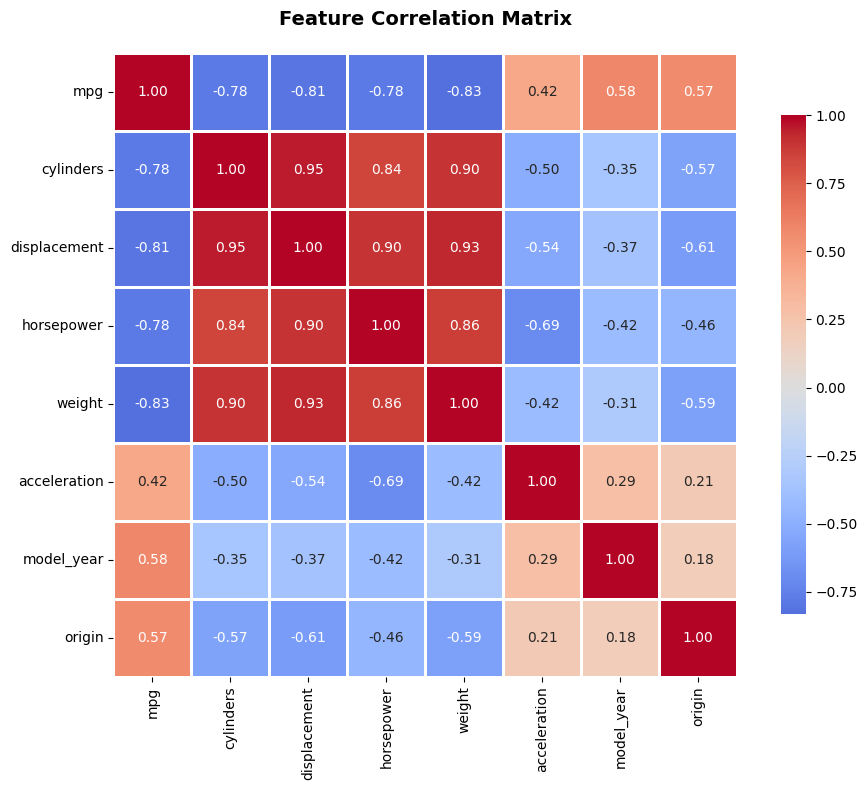


Correlations with MPG (target):
mpg             1.000000
model_year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64


In [14]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with MPG
print("\nCorrelations with MPG (target):")
print(corr_matrix['mpg'].sort_values(ascending=False))

## 3. Linear Regression Implementation (from previous notebook)

In [15]:
# Import functions from the linear regression module
from linear_regression import (preprocess, reverse_scaling, compute_cost, 
                                gradient_descent, pinv, find_best_alpha,
                                forward_feature_selection)

print("✓ Successfully imported linear regression functions:")
print("  - preprocess(), reverse_scaling()")
print("  - compute_cost(), gradient_descent(), pinv()")
print("  - find_best_alpha(), forward_feature_selection()")

✓ Successfully imported linear regression functions:
  - preprocess(), reverse_scaling()
  - compute_cost(), gradient_descent(), pinv()
  - find_best_alpha(), forward_feature_selection()


## 4. Prepare Data for Training

In [16]:
# Preprocess: normalize features and target
X_scaled, y_scaled = preprocess(X, y)

# Add bias term
X_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split data: 70% train, 20% validation, 10% test
data_size = X_with_bias.shape[0]
train_size = int(0.7 * data_size)
val_size = int(0.2 * data_size)
test_size = data_size - train_size - val_size

np.random.seed(42)
indices = np.random.permutation(data_size)
train_idx = indices[:train_size]
val_idx = indices[train_size:train_size + val_size]
test_idx = indices[train_size + val_size:]

X_train = X_with_bias[train_idx]
X_val = X_with_bias[val_idx]
X_test = X_with_bias[test_idx]

y_train = y_scaled[train_idx]
y_val = y_scaled[val_idx]
y_test = y_scaled[test_idx]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nFeatures (including bias): {X_train.shape[1]}")

Training set: 274 samples
Validation set: 78 samples
Test set: 40 samples

Features (including bias): 8


## 5. Find Best Learning Rate (Alpha)

In [17]:
# Test different learning rates
alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
alpha_dict = {}

for alpha in alphas:
    np.random.seed(42)
    theta = np.random.random(size=X_train.shape[1])
    final_theta, J_history = gradient_descent(X_train, y_train, theta, alpha, 40000)
    
    # Use validation cost for comparison
    val_cost = compute_cost(X_val, y_val, final_theta)
    alpha_dict[alpha] = val_cost
    print(f"Alpha: {alpha:>8} | Validation Cost: {val_cost:.6f}")

# Find best alpha
best_alpha = min(alpha_dict, key=alpha_dict.get)
print(f"\n✓ Best learning rate: {best_alpha}")
print(f"  Validation cost: {alpha_dict[best_alpha]:.6f}")

Alpha:    1e-05 | Validation Cost: 0.307286
Alpha:    3e-05 | Validation Cost: 0.101949
Alpha:   0.0001 | Validation Cost: 0.048327
Alpha:   0.0003 | Validation Cost: 0.017571
Alpha:    0.001 | Validation Cost: 0.005617
Alpha:    0.003 | Validation Cost: 0.003754
Alpha:     0.01 | Validation Cost: 0.003474
Alpha:     0.03 | Validation Cost: 0.003344
Alpha:      0.1 | Validation Cost: 0.003271
Alpha:      0.3 | Validation Cost: 0.003253
Gradient descent diverged. Try reducing alpha.
Alpha:        1 | Validation Cost: 356888090893896105185970623154932642565059403748861493757341997584395908777768560801823812543713709791813020908460156917927196458350640176328812105682155785836469712059419586221837922578412248846142999104247699626320737306477533529167549484647672647495781558041962464012228776344321422668957190299804762112.000000
Gradient descent diverged. Try reducing alpha.
Alpha:        2 | Validation Cost: 5494237952719954742271478949956842780237451165298489755209557528345563796372317269

c:\Users\evya1\anaconda3\envs\evya_venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## 6. Forward Feature Selection - Find Elbow Point

In [18]:
# Run forward feature selection for all features
n_features = X_train.shape[1] - 1  # Exclude bias
print(f"Running forward feature selection for up to {n_features} features...")
print("This may take a few minutes...\n")

selected_features, validation_costs = forward_feature_selection(
    X_train, y_train, X_val, y_val, 
    alpha=best_alpha, 
    num_iter=20000, 
    max_features=n_features
)

print(f"\n✓ Forward selection complete!")
print(f"Selected features order: {selected_features}")
print(f"Validation costs: {[f'{c:.6f}' for c in validation_costs]}")

Running forward feature selection for up to 7 features...
This may take a few minutes...


✓ Forward selection complete!
Selected features order: [3, 5, 0, 6, 1, 2, 4]
Validation costs: ['0.004024', '0.003167', '0.003122', '0.003101', '0.003090', '0.003044', '0.003189']


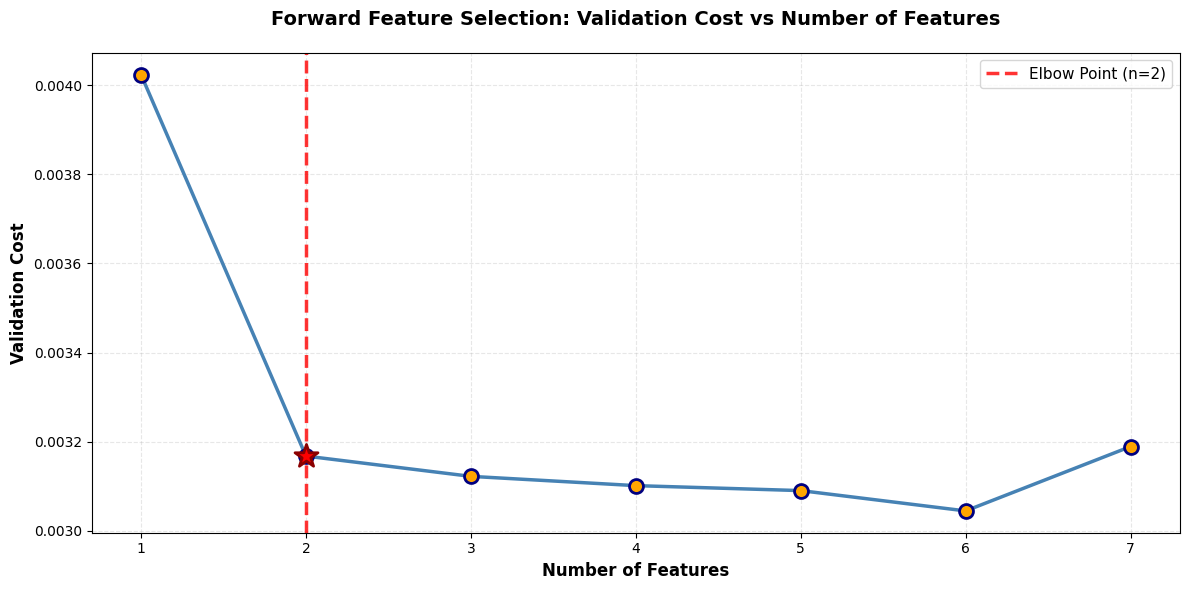


ELBOW POINT DETECTION
Elbow detected at: 2 features
Validation cost at elbow: 0.003167

Improvement rates (% reduction per feature added):
  1 → 2 features: 21.29%
  2 → 3 features: 1.44%
  3 → 4 features: 0.67%
  4 → 5 features: 0.36%
  5 → 6 features: 1.48%


In [19]:
# Visualize validation cost vs number of features
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(validation_costs) + 1), validation_costs, 
         marker='o', linewidth=2.5, markersize=10, color='steelblue',
         markerfacecolor='orange', markeredgewidth=2, markeredgecolor='navy')
plt.xlabel('Number of Features', fontsize=12, fontweight='bold')
plt.ylabel('Validation Cost', fontsize=12, fontweight='bold')
plt.title('Forward Feature Selection: Validation Cost vs Number of Features', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(1, len(validation_costs) + 1))

# Calculate improvement rate (slope between consecutive points)
improvements = np.diff(validation_costs)
improvement_rate = np.abs(improvements / validation_costs[:-1])

# Find elbow: where improvement rate drops below a threshold
threshold = 0.02  # 2% improvement
elbow_candidates = np.where(improvement_rate < threshold)[0]
if len(elbow_candidates) > 0:
    elbow_point = elbow_candidates[0] + 1  # +1 because diff reduces length by 1
else:
    elbow_point = len(validation_costs) // 2  # Fallback: middle point

# Mark the elbow point
plt.axvline(x=elbow_point, color='red', linestyle='--', linewidth=2.5, 
            label=f'Elbow Point (n={elbow_point})', alpha=0.8)
plt.scatter([elbow_point], [validation_costs[elbow_point-1]], 
            s=300, color='red', zorder=5, marker='*', 
            edgecolors='darkred', linewidths=2)

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"ELBOW POINT DETECTION")
print(f"{'='*60}")
print(f"Elbow detected at: {elbow_point} features")
print(f"Validation cost at elbow: {validation_costs[elbow_point-1]:.6f}")
print(f"\nImprovement rates (% reduction per feature added):")
for i, rate in enumerate(improvement_rate[:min(5, len(improvement_rate))], 1):
    print(f"  {i} → {i+1} features: {rate*100:.2f}%")
print(f"{'='*60}")

## 7. Train Final Model with Optimal Features and Evaluate on Test Set

In [20]:
# Get feature names for interpretation
feature_names = list(df_clean.drop(columns=['mpg']).columns)

# Use the elbow point number of features
best_n_features = elbow_point
best_features = selected_features[:best_n_features]

print(f"Training final model with {best_n_features} features:")
for i, feat_idx in enumerate(best_features, 1):
    print(f"  {i}. {feature_names[feat_idx]}")

# Extract selected features (bias + selected features)
feature_indices = [0] + [f + 1 for f in best_features]
X_train_best = X_train[:, feature_indices]
X_test_best = X_test[:, feature_indices]

# Train the model
np.random.seed(42)
theta_final = np.random.random(size=len(feature_indices))
theta_final, J_history = gradient_descent(X_train_best, y_train, theta_final, best_alpha, 20000)

print(f"\n✓ Model trained successfully!")
print(f"  Converged after {len(J_history)} iterations")
print(f"  Final training cost: {J_history[-1]:.6f}")

# Evaluate on test set
y_test_pred_scaled = X_test_best @ theta_final
y_test_pred = reverse_scaling(y_test_pred_scaled, y)
y_test_original = reverse_scaling(y_test, y)

# Calculate metrics
residuals = y_test_original - y_test_pred
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((y_test_original - np.mean(y_test_original)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
mape = np.mean(np.abs(residuals / y_test_original)) * 100

print(f"\n{'='*70}")
print(f"TEST SET PERFORMANCE - AUTO MPG PREDICTION")
print(f"{'='*70}")
print(f"\nModel: Linear Regression with {best_n_features} features (elbow point)")
print(f"Features: {[feature_names[f] for f in best_features]}")
print(f"\n--- Performance Metrics ---")
print(f"R² Score: {r_squared:.4f} ({r_squared*100:.2f}% of variance explained)")
print(f"RMSE: {rmse:.2f} MPG")
print(f"MAE: {mae:.2f} MPG")
print(f"MAPE: {mape:.2f}%")
print(f"Mean of Residuals: {np.mean(residuals):.4f} MPG (bias check)")
print(f"{'='*70}")

Training final model with 2 features:
  1. weight
  2. model_year

✓ Model trained successfully!
  Converged after 522 iterations
  Final training cost: 0.004626

TEST SET PERFORMANCE - AUTO MPG PREDICTION

Model: Linear Regression with 2 features (elbow point)
Features: ['weight', 'model_year']

--- Performance Metrics ---
R² Score: 0.8606 (86.06% of variance explained)
RMSE: 2.76 MPG
MAE: 2.26 MPG
MAPE: 9.32%
Mean of Residuals: 0.5422 MPG (bias check)


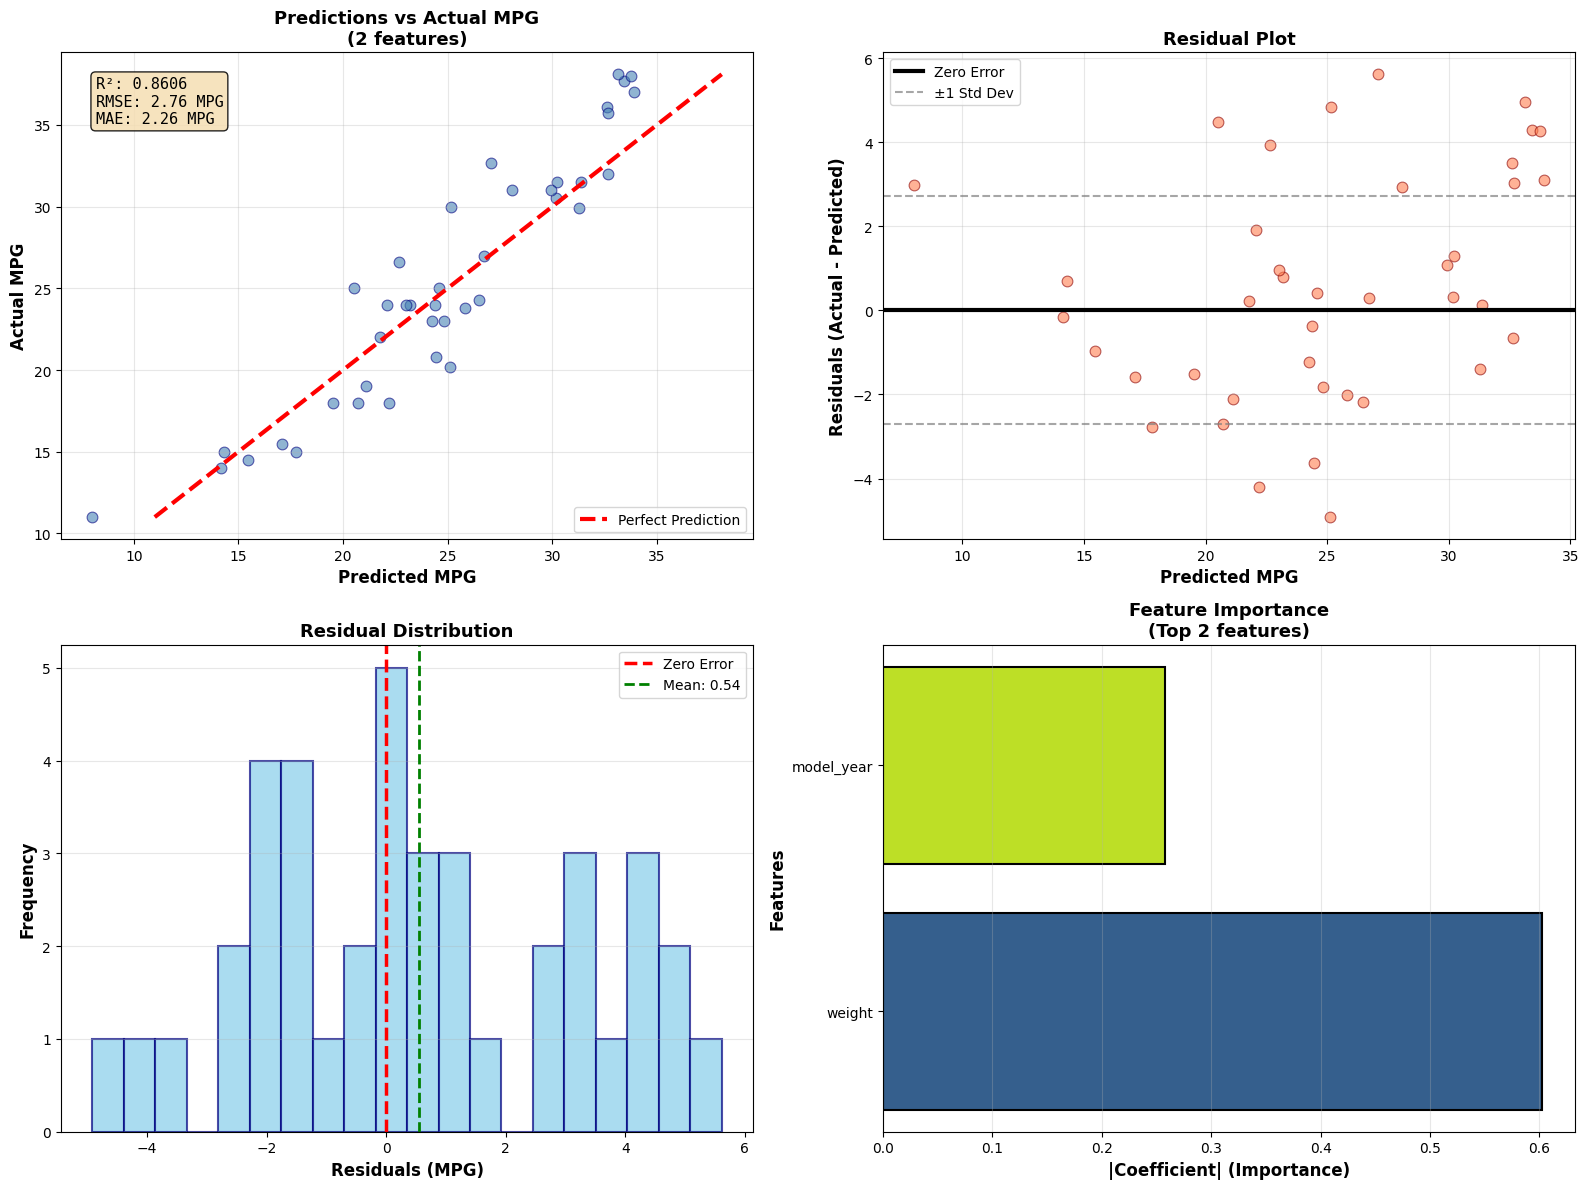


FEATURE COEFFICIENTS (Scaled)
Bias term: 0.487434
1. weight         :  -0.602473  (|coef|: 0.602473)
2. model_year     :   0.258176  (|coef|: 0.258176)


In [21]:
# Comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Predictions vs Actual
ax1 = axes[0, 0]
ax1.scatter(y_test_pred, y_test_original, alpha=0.6, s=60, c='steelblue', 
            edgecolors='navy', linewidth=0.8)
ax1.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         'r--', lw=3, label='Perfect Prediction')
ax1.set_xlabel('Predicted MPG', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual MPG', fontsize=12, fontweight='bold')
ax1.set_title(f'Predictions vs Actual MPG\n({best_n_features} features)', 
              fontsize=13, fontweight='bold')

# Add metrics text box
textstr = f'R²: {r_squared:.4f}\nRMSE: {rmse:.2f} MPG\nMAE: {mae:.2f} MPG'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.85)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=props, family='monospace')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Residual Plot
ax2 = axes[0, 1]
ax2.scatter(y_test_pred, residuals, alpha=0.6, s=60, c='coral', 
            edgecolors='darkred', linewidth=0.8)
ax2.axhline(y=0, color='black', linestyle='-', lw=3, label='Zero Error')
# Add +/- 1 std bands
std_resid = np.std(residuals)
ax2.axhline(y=std_resid, color='gray', linestyle='--', lw=1.5, alpha=0.7, label='±1 Std Dev')
ax2.axhline(y=-std_resid, color='gray', linestyle='--', lw=1.5, alpha=0.7)
ax2.set_xlabel('Predicted MPG', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Plot', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Residual Distribution
ax3 = axes[1, 0]
ax3.hist(residuals, bins=20, color='skyblue', edgecolor='navy', alpha=0.7, linewidth=1.5)
ax3.axvline(x=0, color='red', linestyle='--', lw=2.5, label='Zero Error')
ax3.axvline(x=np.mean(residuals), color='green', linestyle='--', lw=2, 
            label=f'Mean: {np.mean(residuals):.2f}')
ax3.set_xlabel('Residuals (MPG)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title('Residual Distribution', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Feature Importance (based on coefficient magnitudes)
ax4 = axes[1, 1]
coefficients = theta_final[1:]  # Exclude bias
feature_importance = np.abs(coefficients)
feature_labels = [feature_names[f] for f in best_features]

# Sort by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_labels[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_features)))
bars = ax4.barh(sorted_features, sorted_importance, color=colors, 
                edgecolor='black', linewidth=1.5)
ax4.set_xlabel('|Coefficient| (Importance)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Features', fontsize=12, fontweight='bold')
ax4.set_title(f'Feature Importance\n(Top {best_n_features} features)', 
              fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print feature coefficients
print(f"\n{'='*70}")
print(f"FEATURE COEFFICIENTS (Scaled)")
print(f"{'='*70}")
print(f"Bias term: {theta_final[0]:.6f}")
for i, (feat_idx, coef) in enumerate(zip(best_features, coefficients), 1):
    print(f"{i}. {feature_names[feat_idx]:15s}: {coef:>10.6f}  (|coef|: {abs(coef):.6f})")
print(f"{'='*70}")

## 8. Summary and Conclusions

### Methodology
1. **Forward Feature Selection**: Greedy algorithm to iteratively select features
2. **Elbow Point Detection**: Identified optimal number of features where improvement rate drops below 2%
3. **Model Training**: Trained linear regression with gradient descent on selected features
4. **Evaluation**: Tested on held-out test set

### Key Findings
- **Optimal Model Complexity**: The elbow point indicates the best trade-off between model complexity and performance
- **Feature Importance**: Coefficients reveal which vehicle characteristics most strongly predict fuel efficiency
- **Model Performance**: R² and RMSE metrics show how well the model generalizes to unseen data

### Advantages of This Approach
- **Avoids Overfitting**: Elbow method prevents using too many features
- **Interpretability**: Fewer features make the model easier to understand
- **Efficiency**: Forward selection is faster than exhaustive search
- **Validation-Based**: Uses validation set to guide feature selection, preserving test set for final evaluation